In [1]:
%matplotlib inline
import re

import numpy as np
import pandas as pd
import seaborn as sns

import ggplot as gp
import matplotlib.pyplot as plt

import vcf

# Set common figure characteristics

In [2]:
ggplot_theme = gp.theme_seaborn(context='poster')

color_list = ["#FF0000","#0000FF","#00FF00","#000000"]

manual_color_scale = gp.scale_color_manual(values=color_list)

# site_cmap =     {"KG": "#FF0000",
#                  "OT": "#000000",
#                  "MS": "#0000FF",
#                  "NB": "#00FF00"}




# Code to manage loading the data into a dataframe

In [3]:
def gather(df, key, value, cols):
    id_vars = [col for col in df.columns if col not in cols]
    id_values = cols
    var_name = key
    value_name = value
    return pd.melt(df, id_vars, id_values, var_name, value_name)

def recode_column(column_name):
    
    if isinstance(column_name,int):
        i = column_name + 1
        return "Factor {i}".format(i=i)
    
    if column_name.upper() == "INDEX":
        return "sample"
    
def load_scores(pcadapt_scores_path, vcf_path):
    vcf_reader = vcf.Reader(open(vcf_path, 'r'))
    indiv_names = vcf_reader.samples
    
    df = pd.read_table(filepath_or_buffer=pcadapt_scores_path, sep='\s', 
                                             header=None, names=indiv_names,
                                             engine='python').T.reset_index()
    df = df.rename(columns=recode_column)
    
    return df

def load_main(pcadapt_path):
    
    return pd.read_table(filepath_or_buffer=pcadapt_path, sep='\t', engine='python').dropna(axis=1)

def set_site_names(df):
    re_site = re.compile('\A\D{,3}')
    df["site"] = df['sample'].apply(lambda indiv: re_site.findall(indiv)[0])
    df.sort(columns='sample', inplace=True)
    df.reset_index(inplace=True)
    df["individuals"] = df.index.values + 1

    return df.drop(["index"], axis=1)

# Load data 

In [4]:
# Paths
vcf_path1 = "/home/gus/remote_mounts/louise/data/genomes/glossina_fuscipes/annotations/SNPs/vcftools_out/ddrad58_populations/individuals/tsetseFINAL_14Oct2014_f2_53.recode.renamed_scaffolds.maf0_05.OT_MS_NB_indv.recode.vcf"
vcf_path2 = "/home/gus/remote_mounts/louise/data/genomes/glossina_fuscipes/annotations/SNPs/tsetseFINAL_14Oct2014_f2_53.recode.renamed_scaffolds.maf0_05.recode.vcf"

data1 = "/home/gus/remote_mounts/louise/data/genomes/glossina_fuscipes/annotations/SNPs/vcftools_out/ddrad58_populations/individuals/PCAdapt/results/PCAdapt_s1000_b500_k2.scores"
data2 = "/home/gus/remote_mounts/louise/data/genomes/glossina_fuscipes/annotations/SNPs/pcadapt_4pops/PCAdapt_4pops_s1000_b500_k2.scores"


In [5]:
# load files
PCAdapt_s1000_b500_k2_scores = load_scores(pcadapt_scores_path=data1,
                                           vcf_path=vcf_path1)

PCAdapt_4pops_s1000_b500_k2_scores = load_scores(pcadapt_scores_path=data2,
                                           vcf_path=vcf_path2)


In [6]:
PCAdapt_s1000_b500_k2_scores = set_site_names(PCAdapt_s1000_b500_k2_scores)
PCAdapt_4pops_s1000_b500_k2_scores = set_site_names(PCAdapt_4pops_s1000_b500_k2_scores)

# One data set has a subset of the other's members for `site`

In [7]:
PCAdapt_s1000_b500_k2_scores.site.unique()

array(['MS', 'NB', 'OT'], dtype=object)

In [8]:
PCAdapt_4pops_s1000_b500_k2_scores.site.unique()

array(['KG', 'MS', 'NB', 'OT'], dtype=object)

# Begin plotting examples 

In [9]:
PCAdapt_s1000_b500_k2_scores.head()

,sample,Factor 1,Factor 2,site,individuals
0,MS11_0001,13.808313,61.877835,MS,1
1,MS11_0004,13.751304,65.369328,MS,2
2,MS11_0006,13.425393,58.713486,MS,3
3,MS11_0012,-3.309295,69.138657,MS,4
4,MS11_0013,-6.628464,81.270891,MS,5


# We plot one data set and get colors assigned

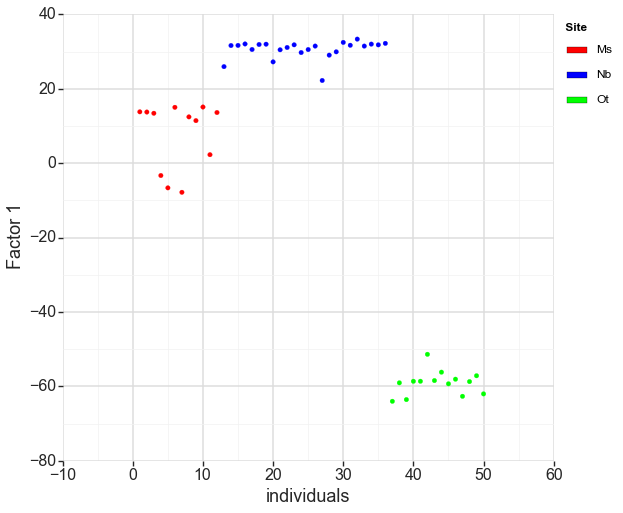

<ggplot: (8785077412477)>

In [10]:
gp_factor1 = gp.ggplot(PCAdapt_s1000_b500_k2_scores, gp.aes('individuals', 'Factor 1', color='site')) \
    + gp.geom_point() \
    + ggplot_theme + manual_color_scale
gp_factor1

# We plot the other data set and get colors assigned

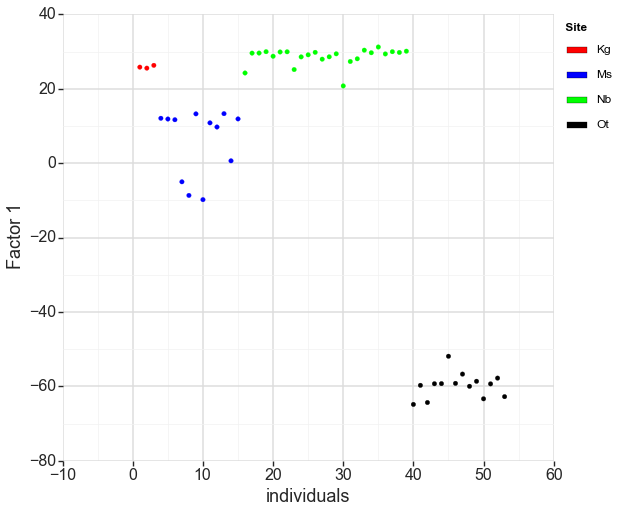

<ggplot: (8785135373613)>

In [11]:
gp_factor1 = gp.ggplot(PCAdapt_4pops_s1000_b500_k2_scores, gp.aes('individuals', 'Factor 1', color='site')) \
    + gp.geom_point() \
    + ggplot_theme + manual_color_scale 
gp_factor1

# Do you see the problem now?

Now KG is red not MS.

I want to be able to assign a color mapping so that MS is red no matter what.  Is this not possible?